### Problem Statement : 
To Perform Exploratory Data Analysis on Suicidal Rates Dataset

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#Let's go ahead and start with some imports
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# For time stamps
from datetime import datetime

In [4]:
PATH = "/home/shivangmathur/Downloads/suicide-rates-overview-1985-to-2016/"

In [5]:
df = pd.read_csv(f'{PATH}master.csv', low_memory=False)

In [6]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [7]:
df.age = df.age.map({'15-24 years': 1,'35-54 years':3,'75+ years':5,'25-34 years':2,'55-74 years':4,'5-14 years':0})

In [8]:
df.drop(['country-year'],axis=1,inplace=True)

In [9]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,1,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,3,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,1,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,5,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,2,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


# Country wise

In [10]:
df1 = df.groupby(by='country').agg({'suicides_no': 'sum'}).reset_index()

In [11]:
df1 = df1.sort_values(by=['suicides_no'],ascending=False)
df2 = df1.head(10)

/home/shivangmathur/anaconda3/envs/fastai_ml_1/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/shivangmathur/anaconda3/envs/fastai_ml_1/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


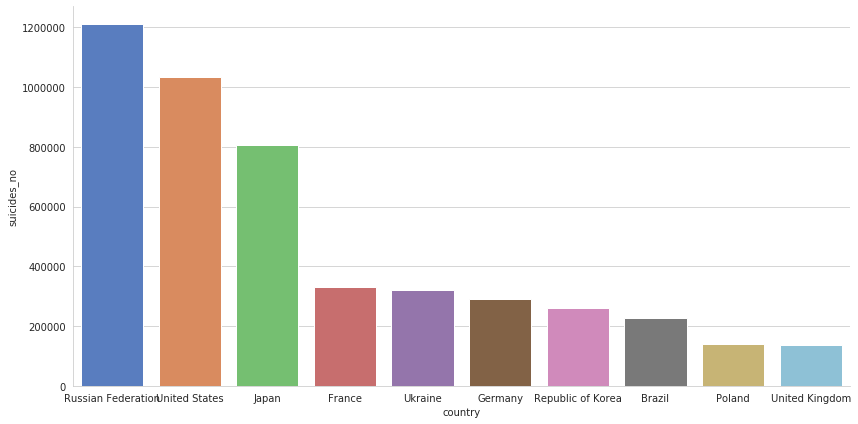

In [12]:
sns.factorplot("country","suicides_no", data=df2,kind="bar",palette="muted",size=6,aspect=2,legend_out=False)


Countries with most number of suicides

In [13]:
df4 = df.groupby(by='country').agg({'suicides/100k pop': 'mean'}).reset_index()
df5 = df4.sort_values(by=['suicides/100k pop'],ascending=False)
df6 = df5.head(10)

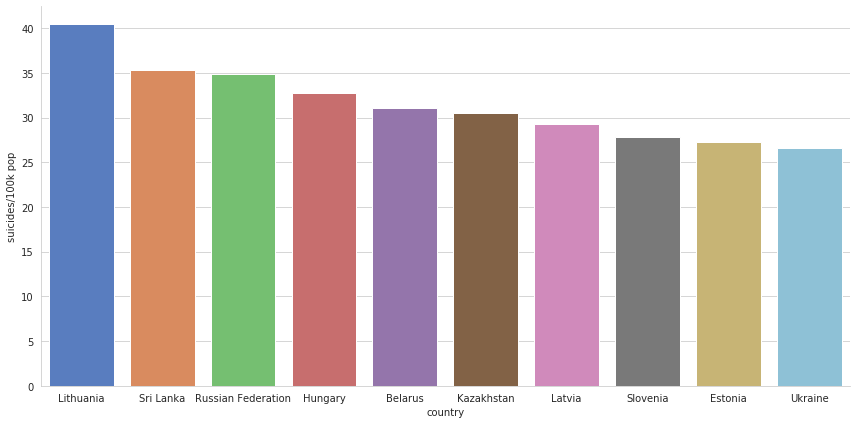

In [14]:
sns.factorplot("country","suicides/100k pop", data=df6,kind="bar",palette="muted",size=6,aspect=2,legend_out=False)


Countries with the highest average of suicides/100k pop

# Sex wise

In [15]:
df3 = df.groupby(by='sex').agg({'suicides_no': 'sum'}).reset_index()

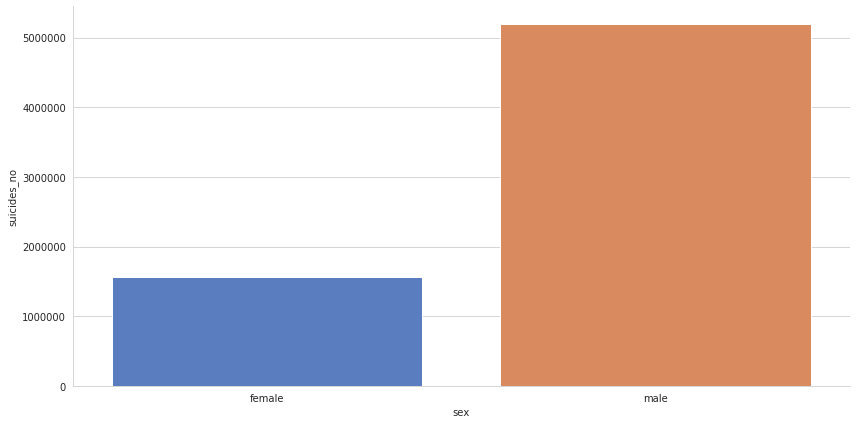

In [16]:
sns.factorplot("sex","suicides_no", data=df3,kind="bar",palette="muted",size=6,aspect=2,legend_out=False)


Number of suicides with both Male and Female

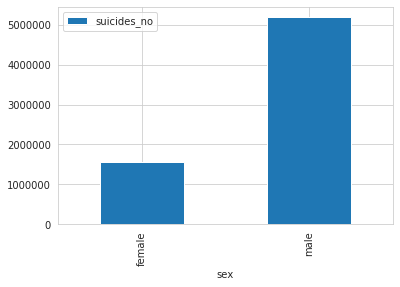

In [17]:
df.groupby(by='sex').agg({'suicides_no': 'sum'}).plot(kind = "bar")

# Year wise

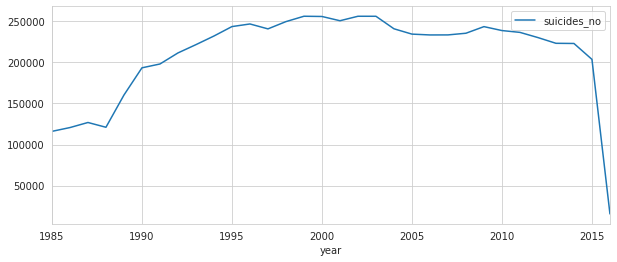

In [18]:
df.groupby(by='year').agg({'suicides_no': 'sum'}).plot(legend=True,figsize=(10,4))

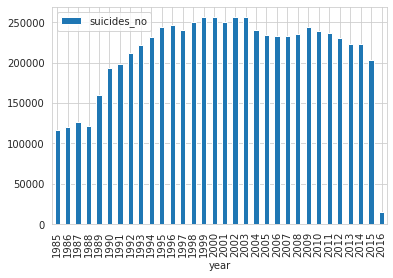

In [19]:
df.groupby(by='year').agg({'suicides_no': 'sum'}).plot(kind="bar")

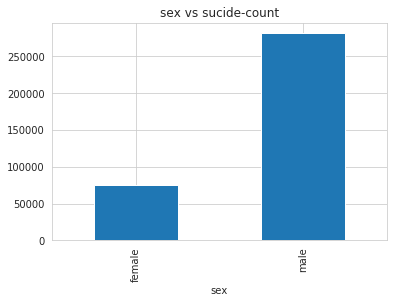

In [20]:
df.groupby(by='sex')['suicides/100k pop'].sum().plot(kind='bar',title="sex vs sucide-count") 

# Age wise

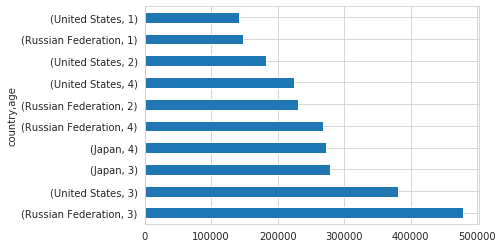

In [21]:
df.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind='barh')

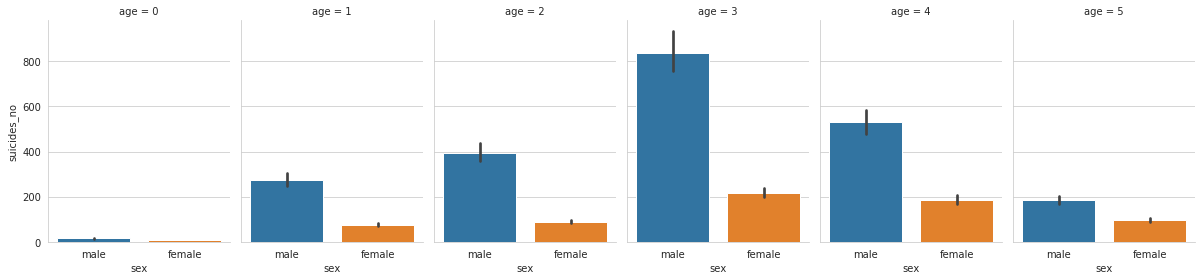

In [22]:
sns.catplot(x="sex", y="suicides_no",col='age', data=df,height=4, aspect=.7,kind='bar')

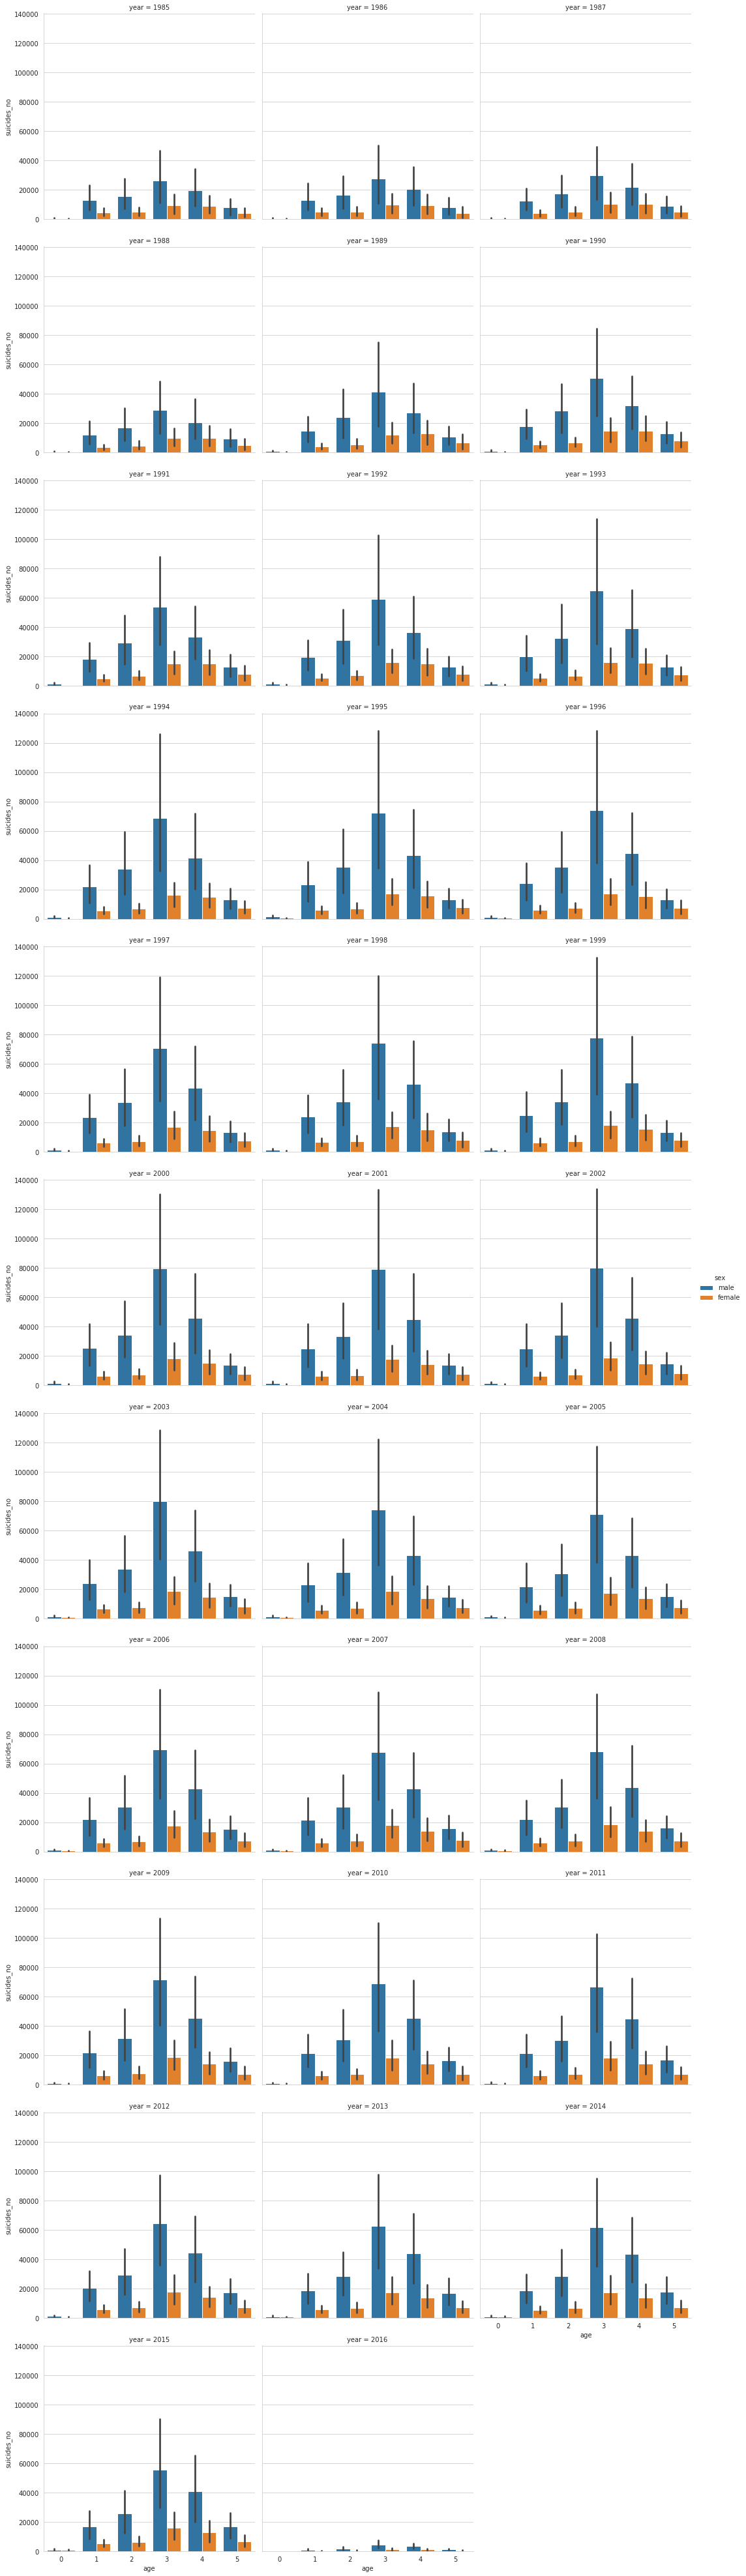

In [23]:
from numpy import sum
sns.catplot('age','suicides_no',hue='sex',col='year',data=df,kind='bar',col_wrap=3,estimator=sum)

# Generation wise

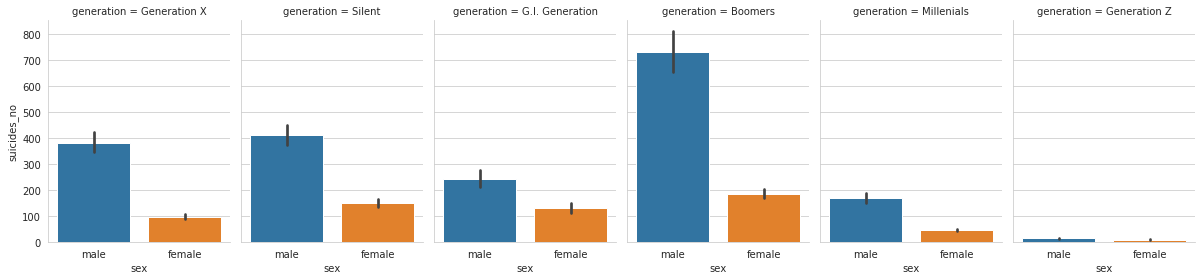

In [24]:
sns.catplot(x="sex", y="suicides_no",col='generation', data=df,height=4, aspect=.7,kind='bar')

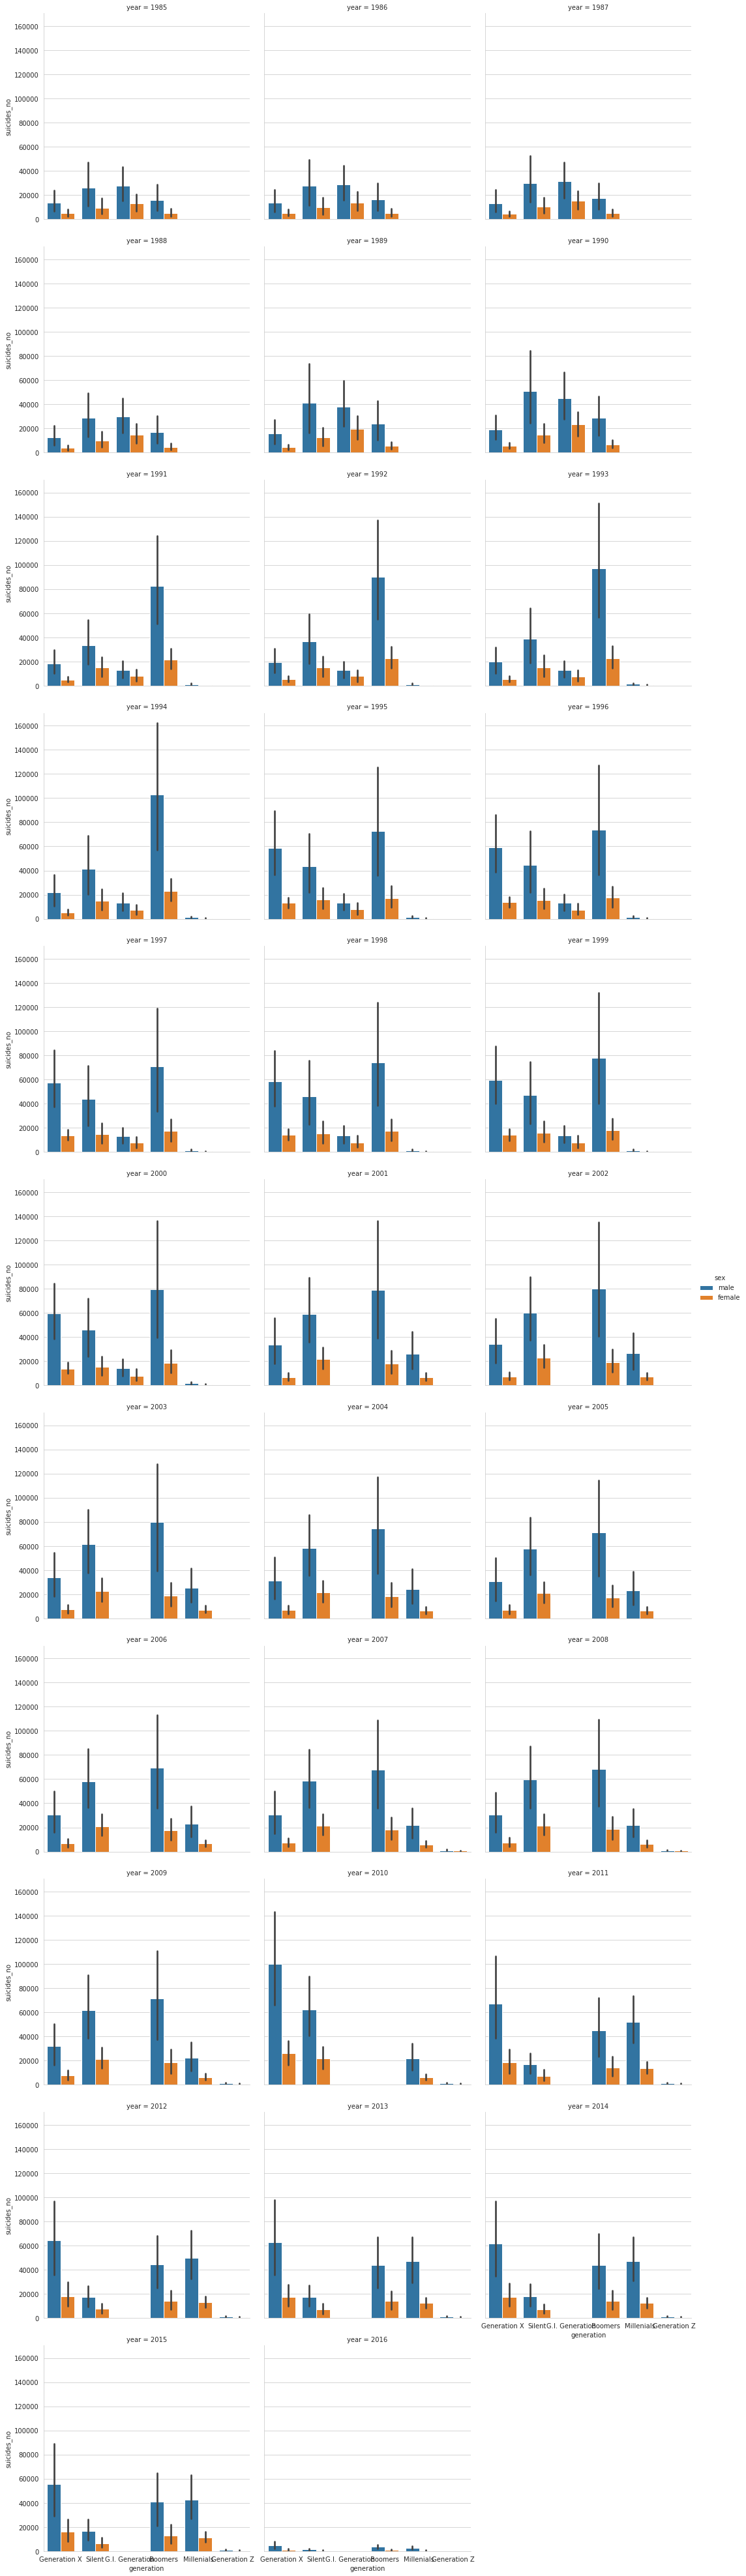

In [25]:
from numpy import sum
sns.catplot('generation','suicides_no',hue='sex',col='year',data=df,kind='bar',col_wrap=3,estimator=sum)